In [1]:
import pandas
import geopandas
import matplotlib.pyplot as plt

## Common coordinate systems

- "EPSG:4326": WGS84 Latitude/Longitude, used in GPS
- "EPSG:3395": Spherical Mercator. Google Maps, OpenStreetMap, Bing Maps
- "EPSG:32633": UTM Zones (North) – (Universal Transverse Mercator)
- "EPSG:32733": UTM Zones (South) – (Universal Transverse Mercator)

In [2]:
df = pandas.read_excel('/Users/todd/GitHub/ecohydrology/Distribution/Info/USACE_Offices_and_locations.xlsx')
offices = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

# Set to WGS84. The coordinates in the file above were created in Google Earth.
offices = offices.set_crs('EPSG:4326')
offices

,Office,URL,Identifier,CEFMS,Location,Longitude,Latitude,geometry
0,Alaska District,https://www.poa.usace.army.mil/,POA,POA,"Fairbanks, AK",-147.719976,64.840051,POINT (-147.71998 64.84005)
1,Albuquerque District,https://www.spa.usace.army.mil/,SPA,SPA,"Albuquerque, NM",-106.518894,35.153813,POINT (-106.51889 35.15381)
2,Army Geospatial Center,https://www.agc.army.mil/,AGC,AGC,"Alexandria, VA",-77.046973,38.804827,POINT (-77.04697 38.80483)
3,Baltimore District,https://www.nab.usace.army.mil/,NAB,NAB,"Baltimore, MD",-76.612305,39.290208,POINT (-76.61230 39.29021)
4,Buffalo District,https://www.lrb.usace.army.mil/,LRB,LRB,"Buffalo, NY",-78.878318,42.886408,POINT (-78.87832 42.88641)
5,Charleston District,https://www.sac.usace.army.mil/,SAC,SAC,"Charleston, SC",-79.927039,32.779717,POINT (-79.92704 32.77972)
6,Chicago District,https://www.lrc.usace.army.mil/,LRC,LRC,"Chicago, IL",-87.571447,41.876518,POINT (-87.57145 41.87652)
7,Detroit District,https://www.lre.usace.army.mil/,LRE,LRE,"Detroit, MI",-82.950811,42.330105,POINT (-82.95081 42.33011)
8,ERDC,https://www.erdc.usace.army.mil/,ERDC,U4,"Vicksburg, MS",-90.838146,32.373925,POINT (-90.83815 32.37393)
9,Europe District,https://www.nau.usace.army.mil,NAU,NAU,"Wiesbaden, Germany",8.240421,50.079701,POINT (8.24042 50.07970)


In [3]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
# North_America = world[world.continent == 'North America']

In [10]:
states = geopandas.read_file('/Users/todd/GitHub/ecohydrology/Distribution/Info/states_21basic/states.shp')

(25.0, 50.0)

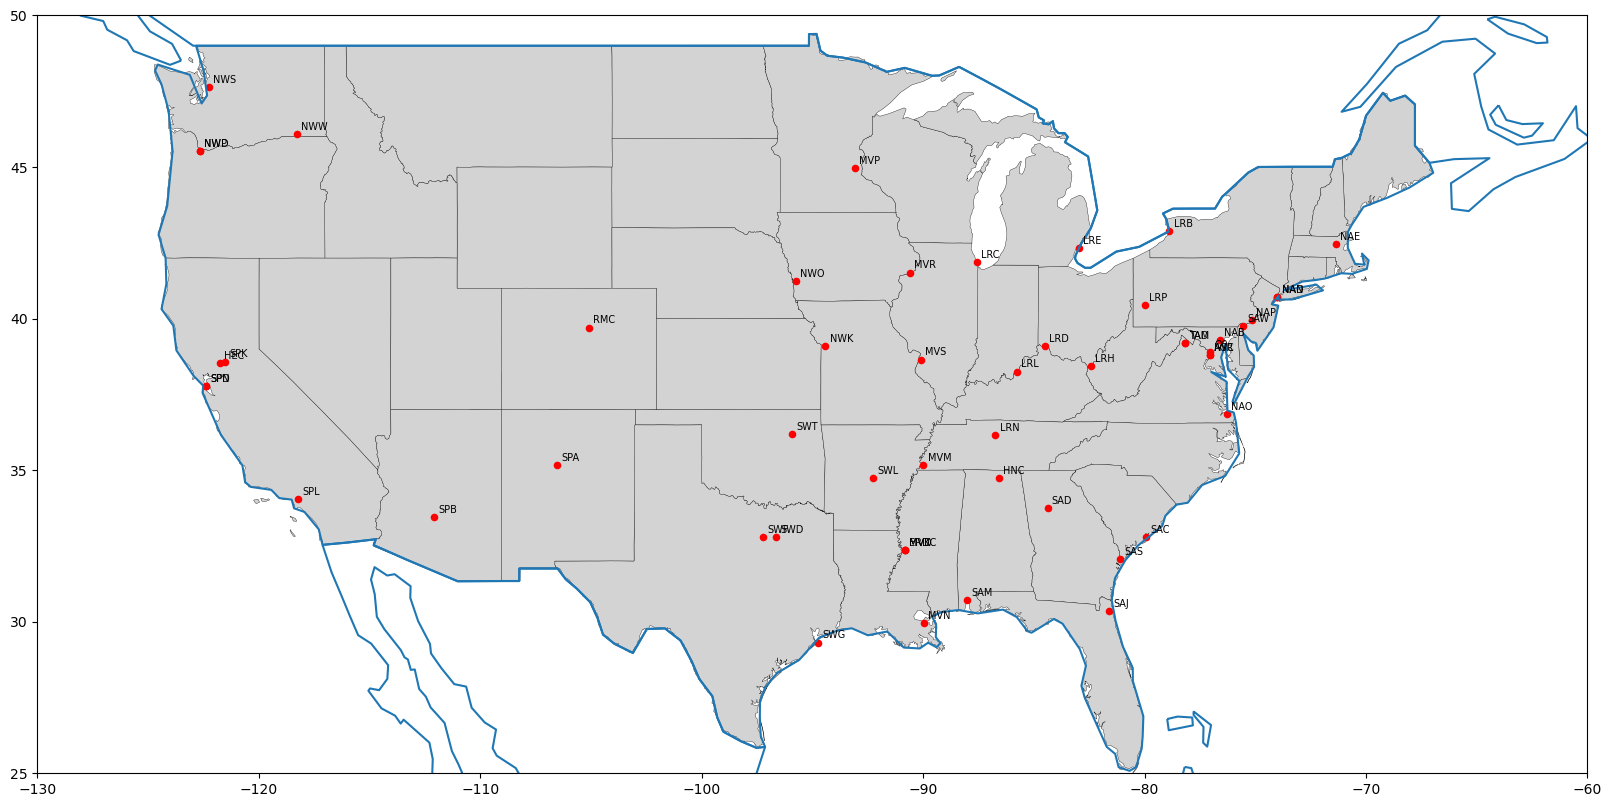

In [22]:
# locations_to_plot = ['RMC', 'SPA', 'SWT', 'NWK', 'NWO', 'SWF', 'MVP']
locations_to_plot = offices.Identifier.values
fig, ax = plt.subplots(1, 1)
fig.set_size_inches([20,20])
world.boundary.plot(ax=ax)
states.plot(ax=ax, color='lightgray', linewidth=0.25, edgecolor='black')
offices.plot(ax=ax, marker='o', color='red', markersize=20)
for x, y, label in zip(offices.geometry.x, offices.geometry.y, offices.Identifier):
    if label in locations_to_plot:
        ax.annotate(label, xy=(x, y), xytext=(3, 3), size=7, textcoords="offset points")
ax.set_xlim([-130,-60])
ax.set_ylim([25,50])


(-1.0, 12500000.0)

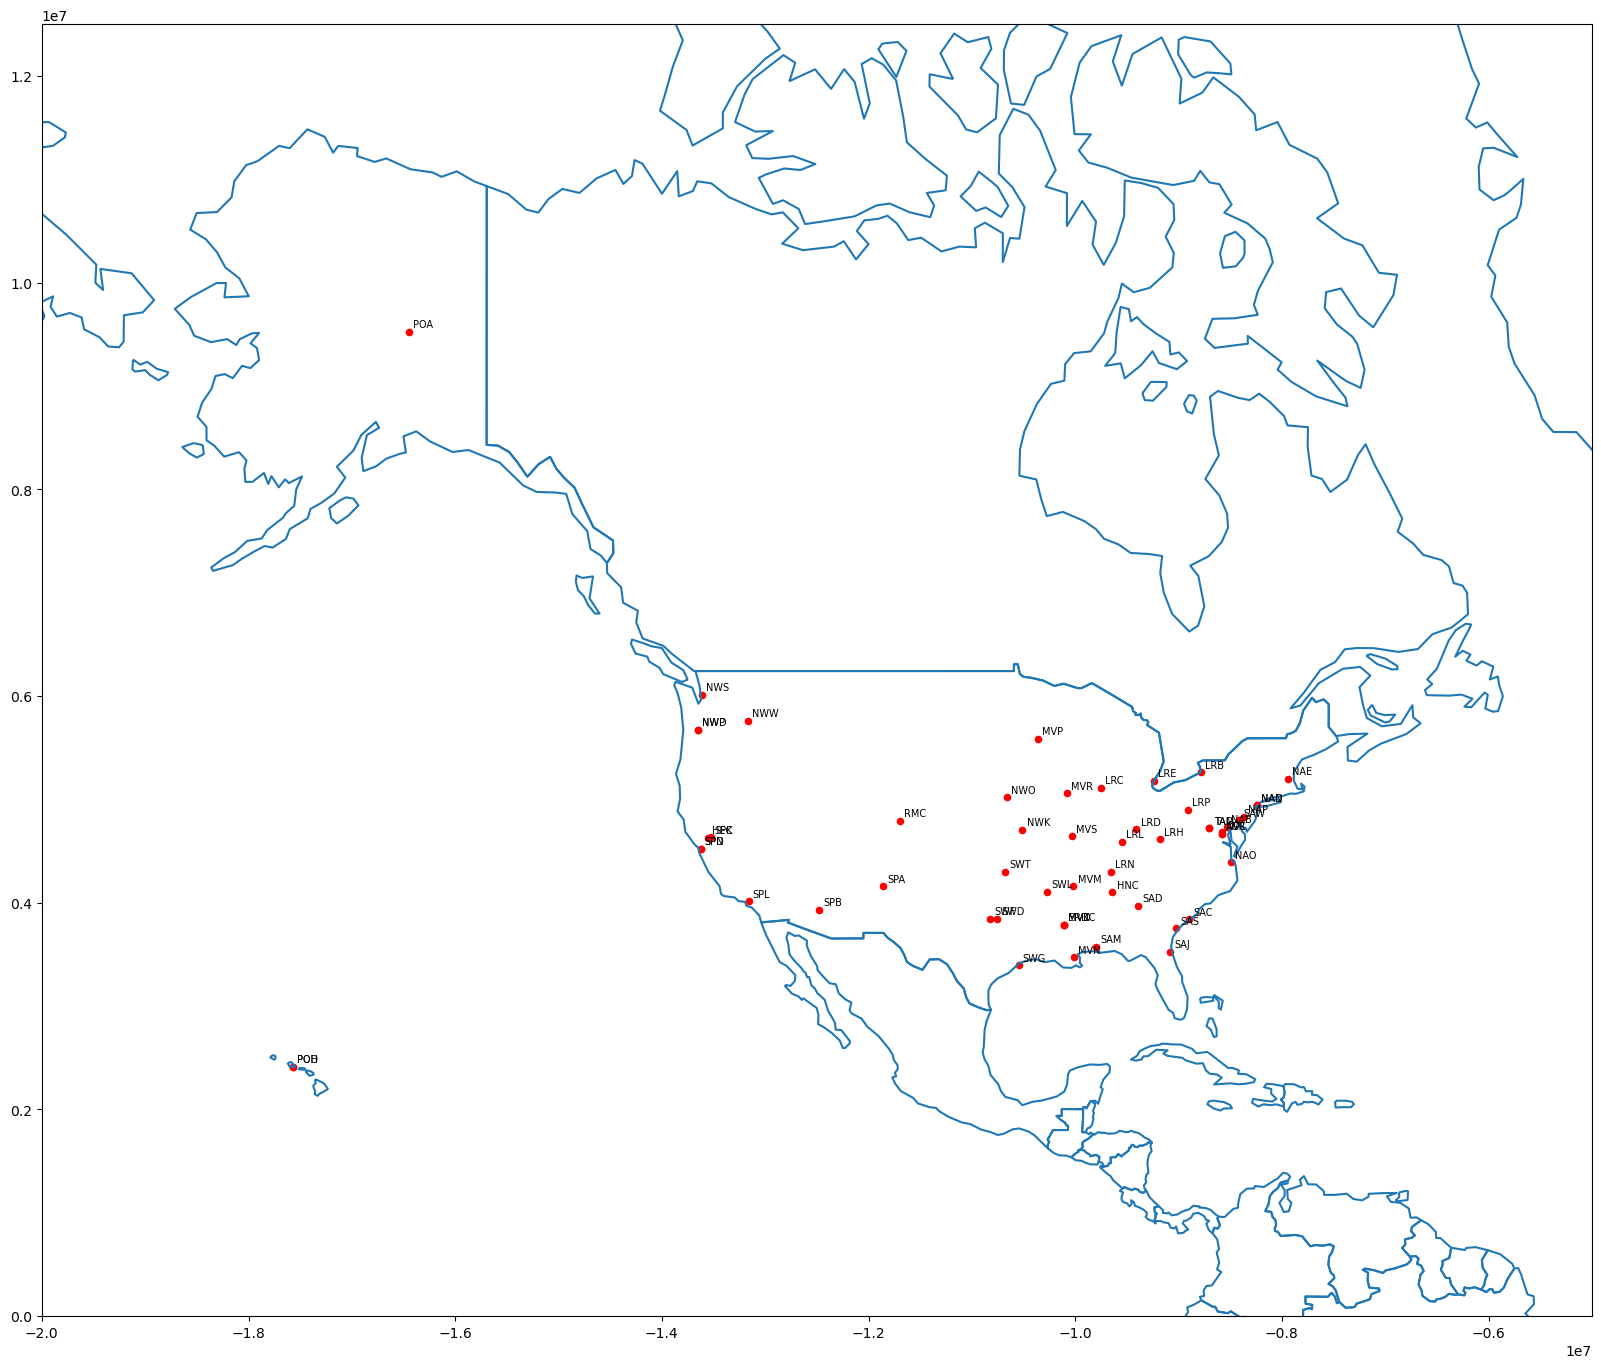

In [5]:
# Plot in Mercator projection
world_mercator = world.to_crs('epsg:3395')
offices_mercator = offices.to_crs('epsg:3395')

locations_to_plot = offices_mercator.Identifier.values
fig, ax = plt.subplots(1, 1)
fig.set_size_inches([20,20])
world_mercator.boundary.plot(ax=ax)
offices_mercator.plot(ax=ax, marker='o', color='red', markersize=20)
for x, y, label in zip(offices_mercator.geometry.x, offices_mercator.geometry.y, offices_mercator.Identifier):
    if label in locations_to_plot:
        ax.annotate(label, xy=(x, y), xytext=(3, 3), size=7, textcoords="offset points")
ax.set_xlim([-2e7,-0.5e7])
ax.set_ylim([-1,1.25e7])

In [6]:
# world.plot(column='pop_est', ax=ax, legend=True)
offices.to_excel('USACE_Offices_and_locations_output.xlsx')